# Statistical Data Visualization with [Seaborn](https://seaborn.pydata.org/)

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It also works quite well with Pandas DataFrames.

The have quite a [nice gallery](https://seaborn.pydata.org/examples/index.html) where you can find many example of plots generated using seaborn with their Python code.

![seaborn](./imgs/seaborn.jpg)

Let us go through some example of how to use pandas, seaborn, and matplotlib together to make some nice plots.

A good dataset would be the tips datasets to show the examples and then do an exercise on titanic dataset, and then group activity?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

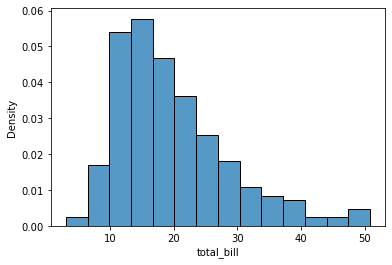

In [3]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="total_bill", ax=ax, stat="density")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

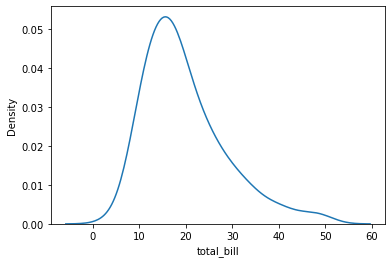

In [4]:
sns.kdeplot(data=df, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

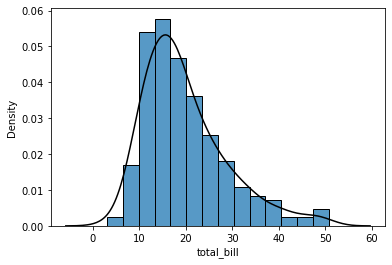

In [5]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="total_bill", stat="density", ax=ax)
sns.kdeplot(data=df, x="total_bill", color="k", ax=ax)

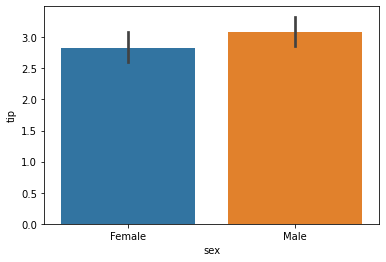

In [6]:
fig, ax = plt.subplots()
sns.barplot(data=df, x="sex", y="tip", ax=ax);

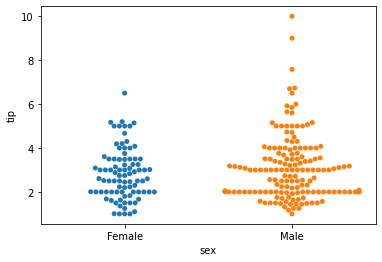

In [7]:
fig, ax = plt.subplots()
sns.swarmplot(data=df, x="sex", y="tip", ax=ax);

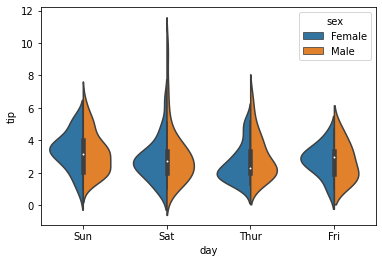

In [8]:
fig, ax = plt.subplots()
sns.violinplot(data=df, x="day", y="tip", hue="sex", split=True, ax=ax);

## Exercise

1. Load the titanic dataset as a pandas DataFrame

In [9]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Answer the following questions with plots. 

Discuss how to best plot the data to answer the question in your group and create high quality plots, using matplotlib and seaborn.

1. What is the distribution of passenger ages?

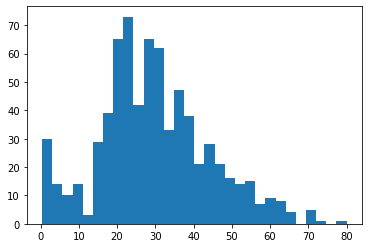

In [10]:
fig, ax = plt.subplots()
ax.hist(df["age"], bins=30);

2. Which gender had a higher survival percentage?

In [11]:
sp_female = np.round(df[df["sex"] == "female"]["survived"].mean() * 100).astype(int)
sp_male = np.round(df[df["sex"] == "male"]["survived"].mean() * 100).astype(int)

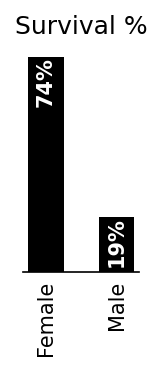

In [12]:
fig, ax = plt.subplots(figsize=(1, 2), dpi=150)

bar_width = .5
ax.bar([0, 1], [sp_female, sp_male], width=bar_width, color='k')

for k in ['top', 'right', 'left']:
    ax.spines[k].set_visible(False)
    
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'], rotation=90);
ax.tick_params(axis="x", length=0)
ax.set_title("Survival %")

# add the numbers over the corresponding bar
ax.text(0, sp_female, f"{sp_female}%", rotation=90, ha='center', va='top', color='w', weight="bold")
ax.text(1, sp_male, f"{sp_male}%", rotation=90, ha='center', va='top', color='w', weight="bold");

3. What is the average ticket price (fare) for each class?

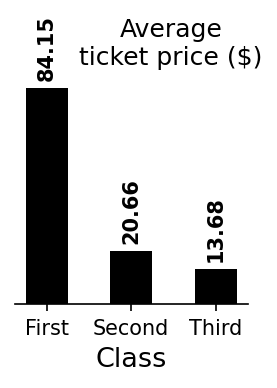

In [13]:
fc_fare = df[df["class"] == "First"]["fare"].mean()
sc_fare = df[df["class"] == "Second"]["fare"].mean()
tc_fare = df[df["class"] == "Third"]["fare"].mean()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)

bar_width = .5
ax.bar([0, 1, 2], [fc_fare, sc_fare, tc_fare], width=bar_width, color='k')

for k in ['top', 'right', 'left']:
    ax.spines[k].set_visible(False)

ax.set_yticks([])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["First", "Second", "Third"])
ax.set_xlabel("Class", fontsize=13)
ax.set_title("Average\nticket price ($)", y=1., x=.67)

# add the numbers on top of the corresponding bar
ax.text(0, fc_fare + 3, f"{fc_fare:.2f}", rotation=90, ha='center', va='bottom', color='k', weight="bold")
ax.text(1, sc_fare + 3, f"{sc_fare:.2f}", rotation=90, ha='center', va='bottom', color='k', weight="bold")
ax.text(2, tc_fare + 3, f"{tc_fare:.2f}", rotation=90, ha='center', va='bottom', color='k', weight="bold");

4. Which ticket class had a higher survival percentage?

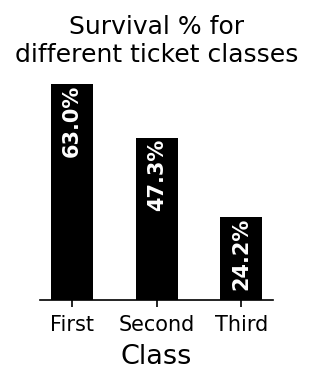

In [14]:
fc_sp = df[df["class"] == "First"]["survived"].mean()
sc_sp = df[df["class"] == "Second"]["survived"].mean()
tc_sp = df[df["class"] == "Third"]["survived"].mean()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)

bar_width = .5
ax.bar([0, 1, 2], [fc_sp, sc_sp, tc_sp], width=bar_width, color='k')

for k in ['top', 'right', 'left']:
    ax.spines[k].set_visible(False)
    
ax.set_yticks([])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["First", "Second", "Third"])
ax.set_xlabel("Class", fontsize=13)
ax.set_title("Survival % for\ndifferent ticket classes")

# add the numbers on top of the corresponding bar
ax.text(0, fc_sp, f"{np.round(fc_sp * 100, 1)}%", rotation=90, ha='center', va='top', color='w', weight="bold")
ax.text(1, sc_sp, f"{np.round(sc_sp * 100, 1)}%", rotation=90, ha='center', va='top', color='w', weight="bold")
ax.text(2, tc_sp, f"{np.round(tc_sp * 100, 1)}%", rotation=90, ha='center', va='top', color='w', weight="bold");

5. Were the passengers generally younger than the average or older?

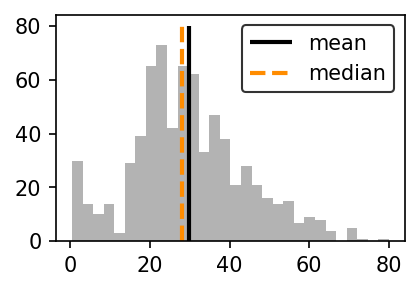

In [15]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)

mean_age = df.age.mean()
median_age = df.age.median()

ax.hist(df.age, bins=30, color='.7')
ax.vlines(mean_age, 0, 80, ls="-", lw=2, color='k', label="mean")
ax.vlines(median_age, 0, 80, ls='--', lw=2, color='darkorange', label="median");

lg = ax.legend(loc="upper right")
lg.get_frame().set_edgecolor('k')